<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/SUPPORT2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [14]:
from ucimlrepo import fetch_ucirepo

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
# fetch dataset
support2 = fetch_ucirepo(id=880)

# metadata
print(support2.metadata)

# variable information
print(support2.variables)

df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','dzgroup','dzclass','edu','income','scoma','race','sps','aps','diabetes','dementia','ca','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph','glucose','bun','urine','sfdm2']]

{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [32]:
print("Number of observations:", len(df))

Number of observations: 9105


In [33]:
df.isnull().sum()

age            0
sex            0
dzgroup        0
dzclass        0
edu         1634
income      2982
scoma          1
race          42
sps            1
aps            1
diabetes       0
dementia       0
ca             0
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
sfdm2       1400
dtype: int64

In [34]:
df.dzgroup.unique()

array(['Lung Cancer', 'Cirrhosis', 'ARF/MOSF w/Sepsis', 'Coma', 'CHF',
       'Colon Cancer', 'COPD', 'MOSF w/Malig'], dtype=object)

In [35]:
df.dzclass.unique()

array(['Cancer', 'COPD/CHF/Cirrhosis', 'ARF/MOSF', 'Coma'], dtype=object)

<ipython-input-36-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

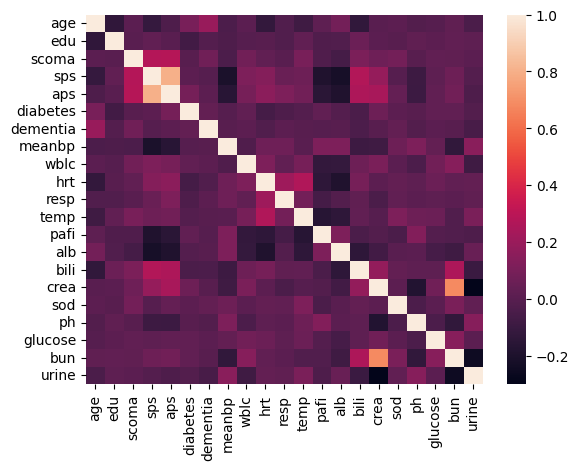

In [36]:
sns.heatmap(df.corr())